## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  38.194254   975.677349  0.248511  6.118375  1.147035
1  92.519177   484.786831  0.597640  4.831379  1.290572
2  93.848996  1183.319324  0.563253  1.358473  1.356233
3   7.568180   971.531362  0.009654  2.060918  0.889803
4  34.095115   826.638337  0.144285  1.156947  1.300584


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471


0:	learn: 1.0141984	total: 63.4ms	remaining: 1m 3s
1:	learn: 1.0068181	total: 77.3ms	remaining: 38.6s
2:	learn: 0.9988830	total: 78.9ms	remaining: 26.2s
3:	learn: 0.9920474	total: 79.3ms	remaining: 19.7s
4:	learn: 0.9828241	total: 80.3ms	remaining: 16s
5:	learn: 0.9753877	total: 81.2ms	remaining: 13.4s
6:	learn: 0.9677794	total: 82ms	remaining: 11.6s
7:	learn: 0.9583738	total: 83.2ms	remaining: 10.3s
8:	learn: 0.9503791	total: 84.1ms	remaining: 9.26s
9:	learn: 0.9424544	total: 84.9ms	remaining: 8.4s
10:	learn: 0.9337285	total: 85.5ms	remaining: 7.68s
11:	learn: 0.9246763	total: 86.2ms	remaining: 7.1s
12:	learn: 0.9169067	total: 87ms	remaining: 6.61s
13:	learn: 0.9081977	total: 88.1ms	remaining: 6.21s
14:	learn: 0.9004131	total: 89.1ms	remaining: 5.85s
15:	learn: 0.8921806	total: 89.8ms	remaining: 5.52s
16:	learn: 0.8828469	total: 90.6ms	remaining: 5.24s
17:	learn: 0.8764731	total: 91.1ms	remaining: 4.97s
18:	learn: 0.8709682	total: 91.9ms	remaining: 4.74s
19:	learn: 0.8621879	total: 92

119:	learn: 0.4300789	total: 143ms	remaining: 1.05s
120:	learn: 0.4274494	total: 145ms	remaining: 1.05s
121:	learn: 0.4250917	total: 146ms	remaining: 1.05s
122:	learn: 0.4226715	total: 147ms	remaining: 1.05s
123:	learn: 0.4205419	total: 148ms	remaining: 1.04s
124:	learn: 0.4177041	total: 148ms	remaining: 1.04s
125:	learn: 0.4152687	total: 149ms	remaining: 1.03s
126:	learn: 0.4129575	total: 150ms	remaining: 1.03s
127:	learn: 0.4109197	total: 150ms	remaining: 1.02s
128:	learn: 0.4089383	total: 151ms	remaining: 1.02s
129:	learn: 0.4069879	total: 151ms	remaining: 1.01s
130:	learn: 0.4047202	total: 152ms	remaining: 1.01s
131:	learn: 0.4032079	total: 152ms	remaining: 1s
132:	learn: 0.4009792	total: 153ms	remaining: 996ms
133:	learn: 0.3996068	total: 153ms	remaining: 989ms
134:	learn: 0.3976760	total: 153ms	remaining: 983ms
135:	learn: 0.3952804	total: 154ms	remaining: 977ms
136:	learn: 0.3934229	total: 154ms	remaining: 972ms
137:	learn: 0.3912972	total: 155ms	remaining: 967ms
138:	learn: 0.3

251:	learn: 0.2462752	total: 199ms	remaining: 589ms
252:	learn: 0.2448068	total: 200ms	remaining: 590ms
253:	learn: 0.2444425	total: 201ms	remaining: 589ms
254:	learn: 0.2440414	total: 201ms	remaining: 588ms
255:	learn: 0.2431359	total: 202ms	remaining: 588ms
256:	learn: 0.2426677	total: 203ms	remaining: 588ms
257:	learn: 0.2414622	total: 204ms	remaining: 587ms
258:	learn: 0.2408701	total: 204ms	remaining: 585ms
259:	learn: 0.2396830	total: 205ms	remaining: 584ms
260:	learn: 0.2386698	total: 206ms	remaining: 582ms
261:	learn: 0.2373153	total: 206ms	remaining: 580ms
262:	learn: 0.2362620	total: 207ms	remaining: 579ms
263:	learn: 0.2356394	total: 207ms	remaining: 577ms
264:	learn: 0.2353467	total: 208ms	remaining: 576ms
265:	learn: 0.2346289	total: 208ms	remaining: 574ms
266:	learn: 0.2332690	total: 208ms	remaining: 572ms
267:	learn: 0.2320000	total: 209ms	remaining: 570ms
268:	learn: 0.2306569	total: 209ms	remaining: 568ms
269:	learn: 0.2295690	total: 210ms	remaining: 566ms
270:	learn: 

362:	learn: 0.1713209	total: 263ms	remaining: 462ms
363:	learn: 0.1711462	total: 266ms	remaining: 465ms
364:	learn: 0.1704788	total: 267ms	remaining: 464ms
365:	learn: 0.1703068	total: 268ms	remaining: 464ms
366:	learn: 0.1701215	total: 268ms	remaining: 463ms
367:	learn: 0.1699743	total: 269ms	remaining: 462ms
368:	learn: 0.1694091	total: 270ms	remaining: 461ms
369:	learn: 0.1687669	total: 270ms	remaining: 460ms
370:	learn: 0.1681272	total: 270ms	remaining: 459ms
371:	learn: 0.1676594	total: 271ms	remaining: 457ms
372:	learn: 0.1674960	total: 272ms	remaining: 456ms
373:	learn: 0.1673207	total: 272ms	remaining: 455ms
374:	learn: 0.1668726	total: 273ms	remaining: 454ms
375:	learn: 0.1667006	total: 273ms	remaining: 453ms
376:	learn: 0.1660749	total: 274ms	remaining: 452ms
377:	learn: 0.1659358	total: 274ms	remaining: 451ms
378:	learn: 0.1656092	total: 274ms	remaining: 450ms
379:	learn: 0.1649406	total: 275ms	remaining: 448ms
380:	learn: 0.1647864	total: 275ms	remaining: 447ms
381:	learn: 

480:	learn: 0.1170075	total: 323ms	remaining: 349ms
481:	learn: 0.1165946	total: 325ms	remaining: 349ms
482:	learn: 0.1162126	total: 330ms	remaining: 354ms
483:	learn: 0.1158859	total: 331ms	remaining: 353ms
484:	learn: 0.1155360	total: 332ms	remaining: 353ms
485:	learn: 0.1152413	total: 333ms	remaining: 352ms
486:	learn: 0.1149074	total: 333ms	remaining: 351ms
487:	learn: 0.1143163	total: 334ms	remaining: 350ms
488:	learn: 0.1139231	total: 335ms	remaining: 350ms
489:	learn: 0.1135409	total: 335ms	remaining: 349ms
490:	learn: 0.1131762	total: 336ms	remaining: 348ms
491:	learn: 0.1128679	total: 337ms	remaining: 347ms
492:	learn: 0.1124993	total: 337ms	remaining: 347ms
493:	learn: 0.1122037	total: 337ms	remaining: 346ms
494:	learn: 0.1119166	total: 338ms	remaining: 345ms
495:	learn: 0.1115747	total: 339ms	remaining: 344ms
496:	learn: 0.1109815	total: 339ms	remaining: 343ms
497:	learn: 0.1107070	total: 340ms	remaining: 342ms
498:	learn: 0.1103261	total: 340ms	remaining: 342ms
499:	learn: 

571:	learn: 0.0894470	total: 394ms	remaining: 295ms
572:	learn: 0.0891702	total: 396ms	remaining: 295ms
573:	learn: 0.0889262	total: 396ms	remaining: 294ms
574:	learn: 0.0888235	total: 397ms	remaining: 293ms
575:	learn: 0.0885523	total: 398ms	remaining: 293ms
576:	learn: 0.0883121	total: 398ms	remaining: 292ms
577:	learn: 0.0882108	total: 398ms	remaining: 291ms
578:	learn: 0.0879449	total: 399ms	remaining: 290ms
579:	learn: 0.0877085	total: 400ms	remaining: 289ms
580:	learn: 0.0876086	total: 400ms	remaining: 289ms
581:	learn: 0.0875102	total: 401ms	remaining: 288ms
582:	learn: 0.0872776	total: 401ms	remaining: 287ms
583:	learn: 0.0870167	total: 401ms	remaining: 286ms
584:	learn: 0.0869196	total: 402ms	remaining: 285ms
585:	learn: 0.0866002	total: 402ms	remaining: 284ms
586:	learn: 0.0863452	total: 403ms	remaining: 283ms
587:	learn: 0.0862492	total: 404ms	remaining: 283ms
588:	learn: 0.0861548	total: 404ms	remaining: 282ms
589:	learn: 0.0858119	total: 405ms	remaining: 281ms
590:	learn: 

618:	learn: 0.0790651	total: 444ms	remaining: 273ms
619:	learn: 0.0788614	total: 445ms	remaining: 273ms
620:	learn: 0.0786687	total: 445ms	remaining: 272ms
621:	learn: 0.0784680	total: 446ms	remaining: 271ms
622:	learn: 0.0782781	total: 447ms	remaining: 270ms
623:	learn: 0.0781276	total: 447ms	remaining: 269ms
624:	learn: 0.0780431	total: 447ms	remaining: 268ms
625:	learn: 0.0778562	total: 448ms	remaining: 268ms
626:	learn: 0.0776564	total: 448ms	remaining: 267ms
627:	learn: 0.0773820	total: 449ms	remaining: 266ms
628:	learn: 0.0771983	total: 449ms	remaining: 265ms
629:	learn: 0.0770009	total: 450ms	remaining: 264ms
630:	learn: 0.0768199	total: 450ms	remaining: 263ms
631:	learn: 0.0766246	total: 451ms	remaining: 262ms
632:	learn: 0.0765425	total: 451ms	remaining: 262ms
633:	learn: 0.0763640	total: 452ms	remaining: 261ms
634:	learn: 0.0762831	total: 452ms	remaining: 260ms
635:	learn: 0.0761074	total: 452ms	remaining: 259ms
636:	learn: 0.0759136	total: 453ms	remaining: 258ms
637:	learn: 

679:	learn: 0.0682710	total: 497ms	remaining: 234ms
680:	learn: 0.0679910	total: 498ms	remaining: 233ms
681:	learn: 0.0679457	total: 498ms	remaining: 232ms
682:	learn: 0.0677480	total: 499ms	remaining: 231ms
683:	learn: 0.0676025	total: 499ms	remaining: 231ms
684:	learn: 0.0673782	total: 499ms	remaining: 230ms
685:	learn: 0.0672345	total: 500ms	remaining: 229ms
686:	learn: 0.0669438	total: 500ms	remaining: 228ms
687:	learn: 0.0668998	total: 500ms	remaining: 227ms
688:	learn: 0.0667488	total: 501ms	remaining: 226ms
689:	learn: 0.0666021	total: 501ms	remaining: 225ms
690:	learn: 0.0662670	total: 502ms	remaining: 224ms
691:	learn: 0.0659868	total: 502ms	remaining: 223ms
692:	learn: 0.0659440	total: 502ms	remaining: 223ms
693:	learn: 0.0658017	total: 503ms	remaining: 222ms
694:	learn: 0.0654763	total: 503ms	remaining: 221ms
695:	learn: 0.0653380	total: 503ms	remaining: 220ms
696:	learn: 0.0650370	total: 504ms	remaining: 219ms
697:	learn: 0.0649953	total: 504ms	remaining: 218ms
698:	learn: 

770:	learn: 0.0545078	total: 565ms	remaining: 168ms
771:	learn: 0.0543602	total: 567ms	remaining: 167ms
772:	learn: 0.0542637	total: 568ms	remaining: 167ms
773:	learn: 0.0541201	total: 569ms	remaining: 166ms
774:	learn: 0.0539308	total: 570ms	remaining: 165ms
775:	learn: 0.0538609	total: 570ms	remaining: 165ms
776:	learn: 0.0537419	total: 571ms	remaining: 164ms
777:	learn: 0.0536480	total: 572ms	remaining: 163ms
778:	learn: 0.0535555	total: 572ms	remaining: 162ms
779:	learn: 0.0534384	total: 573ms	remaining: 162ms
780:	learn: 0.0532992	total: 573ms	remaining: 161ms
781:	learn: 0.0531167	total: 574ms	remaining: 160ms
782:	learn: 0.0530498	total: 574ms	remaining: 159ms
783:	learn: 0.0529346	total: 575ms	remaining: 158ms
784:	learn: 0.0528446	total: 575ms	remaining: 158ms
785:	learn: 0.0526790	total: 576ms	remaining: 157ms
786:	learn: 0.0525664	total: 576ms	remaining: 156ms
787:	learn: 0.0524773	total: 576ms	remaining: 155ms
788:	learn: 0.0522998	total: 577ms	remaining: 154ms
789:	learn: 

918:	learn: 0.0385440	total: 629ms	remaining: 55.5ms
919:	learn: 0.0384368	total: 631ms	remaining: 54.9ms
920:	learn: 0.0382961	total: 632ms	remaining: 54.2ms
921:	learn: 0.0381426	total: 633ms	remaining: 53.6ms
922:	learn: 0.0380152	total: 634ms	remaining: 52.9ms
923:	learn: 0.0378930	total: 635ms	remaining: 52.2ms
924:	learn: 0.0377811	total: 636ms	remaining: 51.5ms
925:	learn: 0.0376799	total: 637ms	remaining: 50.9ms
926:	learn: 0.0375555	total: 637ms	remaining: 50.2ms
927:	learn: 0.0374802	total: 638ms	remaining: 49.5ms
928:	learn: 0.0373548	total: 638ms	remaining: 48.8ms
929:	learn: 0.0372371	total: 639ms	remaining: 48.1ms
930:	learn: 0.0371067	total: 639ms	remaining: 47.4ms
931:	learn: 0.0370876	total: 640ms	remaining: 46.7ms
932:	learn: 0.0370161	total: 640ms	remaining: 46ms
933:	learn: 0.0369171	total: 641ms	remaining: 45.3ms
934:	learn: 0.0367976	total: 641ms	remaining: 44.6ms
935:	learn: 0.0367770	total: 642ms	remaining: 43.9ms
936:	learn: 0.0366452	total: 642ms	remaining: 43

983:	learn: 0.0323002	total: 674ms	remaining: 11ms
984:	learn: 0.0322373	total: 675ms	remaining: 10.3ms
985:	learn: 0.0322152	total: 675ms	remaining: 9.58ms
986:	learn: 0.0321043	total: 675ms	remaining: 8.9ms
987:	learn: 0.0320084	total: 676ms	remaining: 8.21ms
988:	learn: 0.0319145	total: 677ms	remaining: 7.52ms
989:	learn: 0.0318352	total: 677ms	remaining: 6.84ms
990:	learn: 0.0318133	total: 677ms	remaining: 6.15ms
991:	learn: 0.0317918	total: 678ms	remaining: 5.47ms
992:	learn: 0.0317076	total: 678ms	remaining: 4.78ms
993:	learn: 0.0315932	total: 679ms	remaining: 4.1ms
994:	learn: 0.0315750	total: 679ms	remaining: 3.41ms
995:	learn: 0.0314788	total: 680ms	remaining: 2.73ms
996:	learn: 0.0314662	total: 680ms	remaining: 2.05ms
997:	learn: 0.0313575	total: 681ms	remaining: 1.36ms
998:	learn: 0.0312794	total: 681ms	remaining: 681us
999:	learn: 0.0312028	total: 681ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.4138812389856711


ABC Pre-generator MAE 0.4351629166028535


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

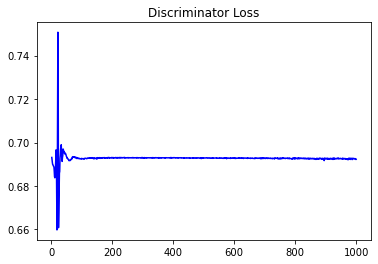

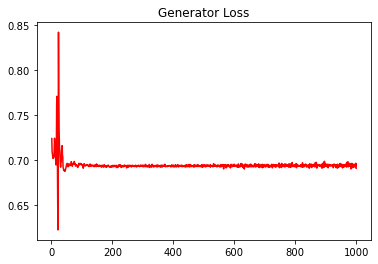

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.46261604357231406


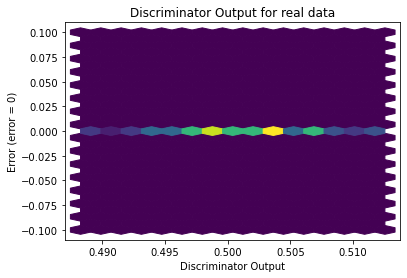

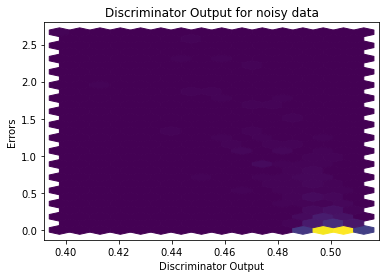

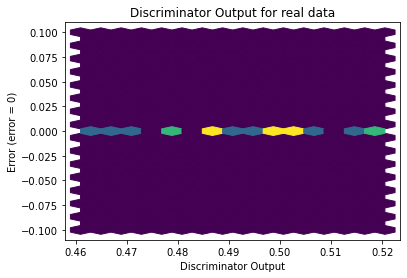

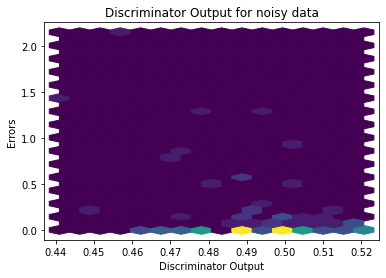

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

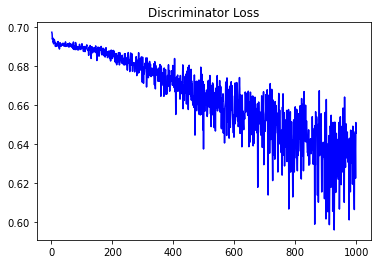

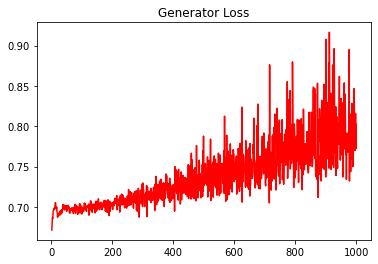

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.4143601122661494


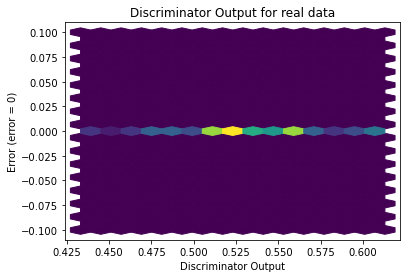

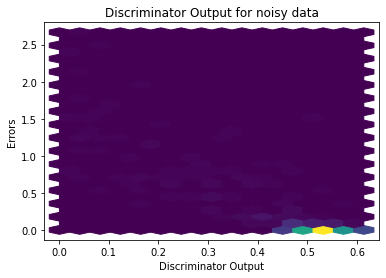

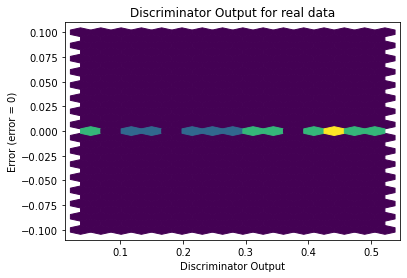

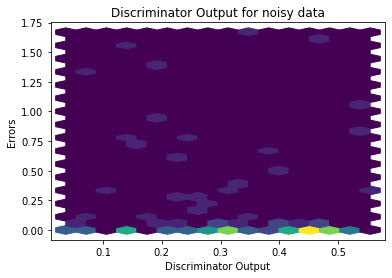

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


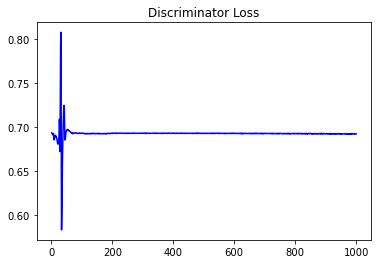

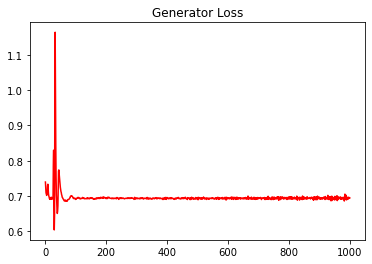

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.4022341612945311


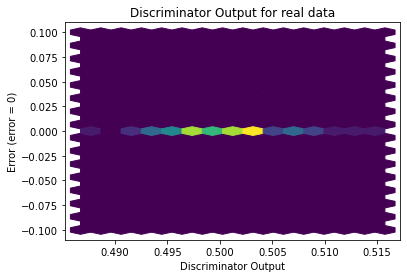

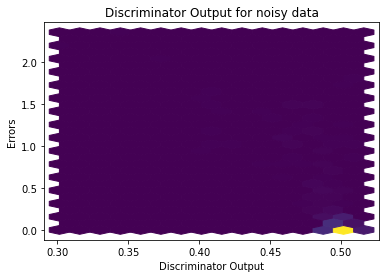

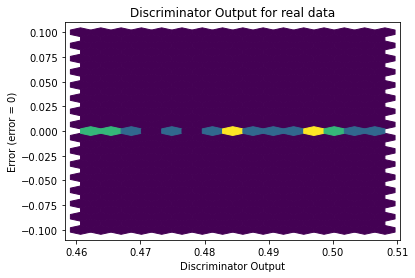

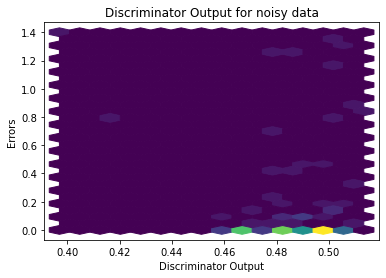

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


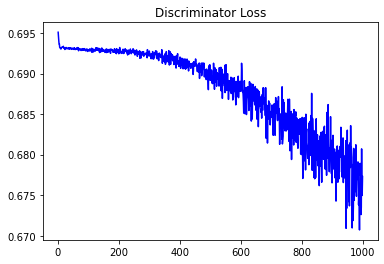

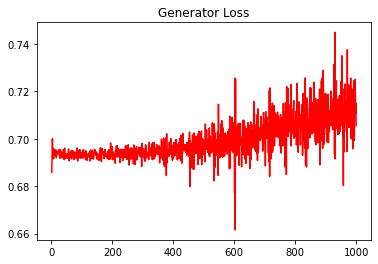

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.4039560989253223


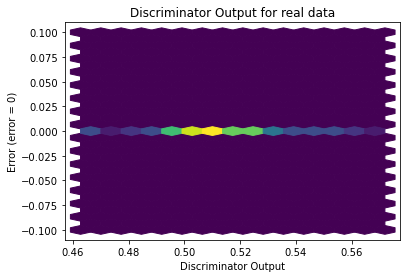

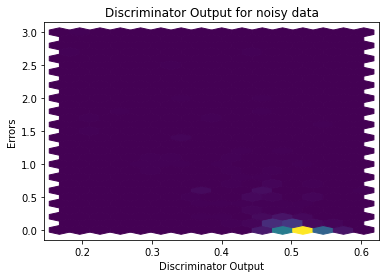

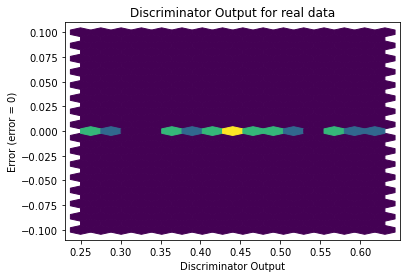

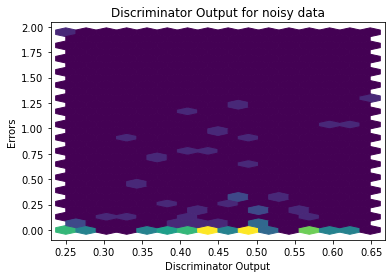

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5136]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0483]], requires_grad=True)
